In [52]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("train_and_test2.csv")

In [118]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [5]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [6]:
for col in df.columns:
    print(f"col {col} unique values: {len(df[col].unique())}")

col Passengerid unique values: 1309
col Age unique values: 98
col Fare unique values: 281
col Sex unique values: 2
col sibsp unique values: 7
col zero unique values: 1
col zero.1 unique values: 1
col zero.2 unique values: 1
col zero.3 unique values: 1
col zero.4 unique values: 1
col zero.5 unique values: 1
col zero.6 unique values: 1
col Parch unique values: 8
col zero.7 unique values: 1
col zero.8 unique values: 1
col zero.9 unique values: 1
col zero.10 unique values: 1
col zero.11 unique values: 1
col zero.12 unique values: 1
col zero.13 unique values: 1
col zero.14 unique values: 1
col Pclass unique values: 3
col zero.15 unique values: 1
col zero.16 unique values: 1
col Embarked unique values: 4
col zero.17 unique values: 1
col zero.18 unique values: 1
col 2urvived unique values: 2


In [7]:
dict(df.Parch.value_counts())

{0: 1002, 1: 170, 2: 113, 3: 8, 5: 6, 4: 6, 6: 2, 9: 2}

In [8]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

In [9]:
for col in df.columns:
    if col.lower().startswith("zero"):
        if len(df[col].unique()):
            df.pop(col)

In [10]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [11]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
2urvived       0
dtype: int64

In [12]:
df.rename(columns = {'2urvived': 'Survived'}, inplace=True)

In [13]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [14]:
df.shape

(1309, 9)

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(1307, 9)

In [17]:
df["Age"][(df["Age"] > 35) & (df["Survived"] == 1)]

1      38.0
11     58.0
15     55.0
25     38.0
52     49.0
       ... 
857    51.0
862    48.0
865    42.0
871    47.0
879    56.0
Name: Age, Length: 81, dtype: float64

In [18]:
df["Age"][(df["Age"] > 35) & (df["Survived"] == 0)]

6       54.0
13      39.0
30      40.0
33      66.0
35      42.0
        ... 
1295    43.0
1298    50.0
1302    37.0
1305    39.0
1306    38.5
Name: Age, Length: 239, dtype: float64

In [480]:
import matplotlib.pyplot as plt

def bar_plot(input_dict, y_label, x_label, title):
    fig, ax = plt.subplots(figsize = (7, 4))
    df = pd.DataFrame(input_dict, index=[0]).T # , index=[0]
    df.rename(columns = {0:"Count"}, inplace=True)
    df['Survived'] = ["Sink", "Lived"]
    print(df.head())


    percentage = []
    n_data = sum(list(input_dict.values()))
    for i in range(df.shape[0]):
        pct = (df["Count"][i] / n_data) * 100
        percentage.append(round(pct,2))
    df['Percentage'] = percentage


    p1 = plt.bar(df.Survived, df["Count"], color = colors_list)
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)


    i = 0
    for bar in p1:
        width = bar.get_width()
        height = bar.get_height()
        x, y = bar.get_xy()
        plt.text(x+width/2, y+height*1.01, str(df.Percentage[i])+'%', ha='center', weight='bold')
        i += 1
    plt.show()

In [481]:
dict(df.Survived.value_counts())

{0: 967, 1: 340}

   Count Survived
0    967     Sink
1    340    Lived


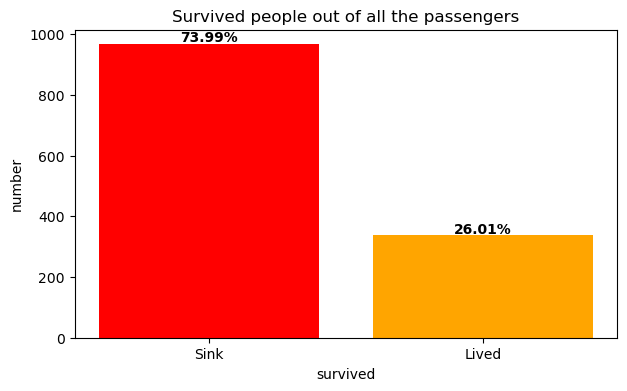

In [482]:
bar_plot(dict(df.Survived.value_counts()), "number", "survived", "Survived people out of all the passengers")

       Count
Sink     239
Lived     81


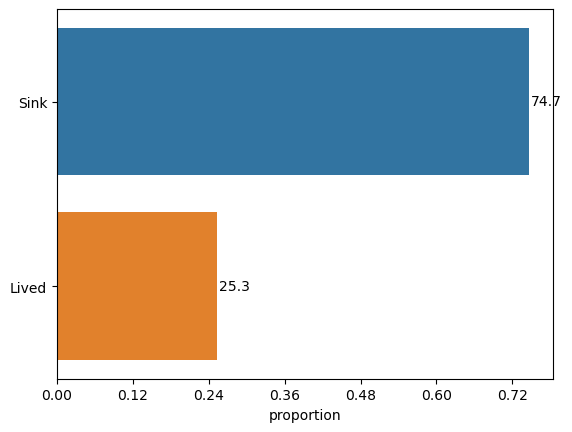

In [503]:
import matplotlib.pyplot as plt
import seaborn as sb

def sb_bar_plot(input_dict, y_label, x_label, title):
    #fig, ax = plt.subplots(figsize = (7, 4))
    df = pd.DataFrame(input_dict, index=[0]).T # , index=[0]
    df.rename(columns = {0:"Count"}, inplace=True)
    #df['Survived'] = ["Sink", "Lived"]
    print(df.head())

    unique_names = df.index
    unique_values = df.Count.tolist()
    n_pkmn = sum(unique_values)
    max_count = unique_values[0]
    max_prob = max_count/n_pkmn
    tick_probs = np.arange(0, max_prob, 0.12)
    tick_names = ['{:0.2f}'.format(v) for v in tick_probs]

    sb.barplot(data = df, x="Count", y=unique_names, order=unique_names);
    plt.xticks(tick_probs * n_pkmn, tick_names)  #, rotation=90
    plt.xlabel('proportion');

    for i in range(len(unique_values)):
        count = unique_values[i]
        pct_string = '{:0.1f}'.format(100*count/n_pkmn)
        plt.text(count+1, i, pct_string, va='center')

sb_bar_plot(older_35, "number", "survived", "Survived people older_35")

In [473]:
older_35 = {"Sink": len(df["Age"][(df["Age"] > 35) & (df["Survived"] == 0)]), "Lived": len(df["Age"][(df["Age"] > 35) & (df["Survived"] == 1)])}

In [385]:
older_35

{'Sink': 239, 'Lived': 81}

       Count Survived
Sink     239     Sink
Lived     81    Lived


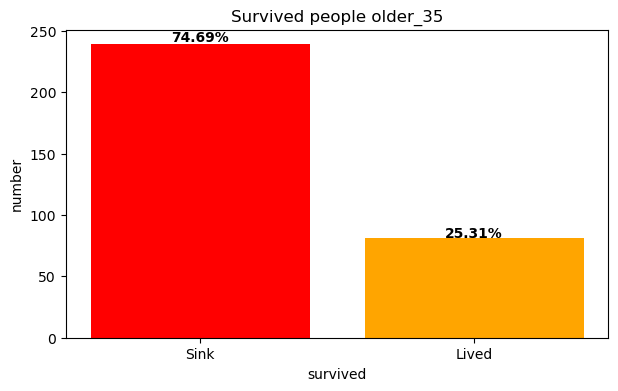

In [421]:
bar_plot(older_35, "number", "survived", "Survived people older_35")

In [387]:
younger_35 = {"Sink": len(df["Age"][(df["Age"] < 35) & (df["Survived"] == 0)]), "Lived": len(df["Age"][(df["Age"] < 35) & (df["Survived"] == 1)])}

In [388]:
younger_35

{'Sink': 716, 'Lived': 248}

         0 Survived
Sink   716     Sink
Lived  248    Lived


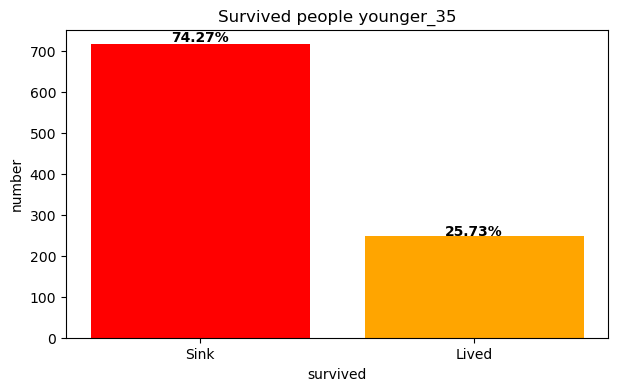

In [389]:
bar_plot(younger_35, "number", "survived", "Survived people younger_35")

In [390]:
dict(df.Pclass.value_counts())

{3: 709, 1: 321, 2: 277}

In [391]:
sink_pclass1 = len(df["Age"][(df["Pclass"] == 1) & (df["Survived"] == 0)])

In [392]:
survived_pclass1 = len(df["Age"][(df["Pclass"] == 1) & (df["Survived"] == 1)])

In [393]:
Pclass_1 = {"Sink":sink_pclass1, "Lived":survived_pclass1}

         0 Survived
Sink   187     Sink
Lived  134    Lived


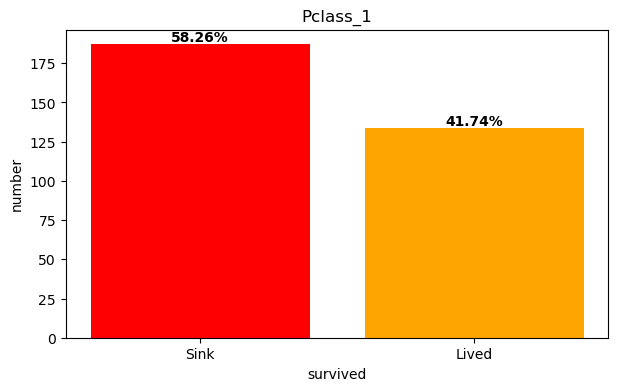

In [394]:
bar_plot(Pclass_1, "number", "survived", "Pclass_1")

In [395]:
sink_pclass2 = len(df["Age"][(df["Pclass"] == 2) & (df["Survived"] == 0)])

In [396]:
survived_pclass2 = len(df["Age"][(df["Pclass"] == 2) & (df["Survived"] == 1)])

In [397]:
Pclass_2 = {"Sink":sink_pclass2, "Lived":survived_pclass2}

         0 Survived
Sink   190     Sink
Lived   87    Lived


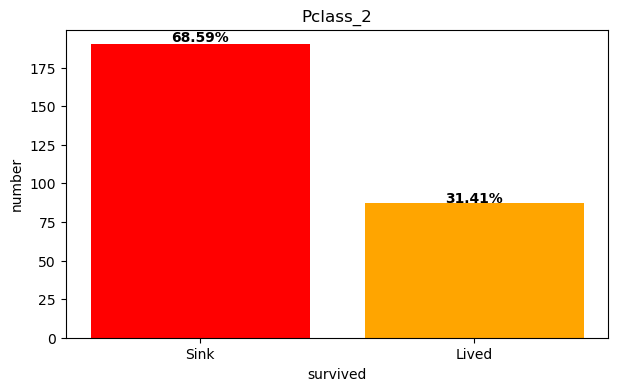

In [398]:
bar_plot(Pclass_2, "number", "survived", "Pclass_2")

In [399]:
sink_pclass3 = len(df["Age"][(df["Pclass"] == 3) & (df["Survived"] == 0)])

In [400]:
survived_pclass3 = len(df["Age"][(df["Pclass"] == 3) & (df["Survived"] == 1)])

In [401]:
Pclass_3 = {"Sink":sink_pclass3, "Lived":survived_pclass3}

       Count Survived
Sink     590     Sink
Lived    119    Lived


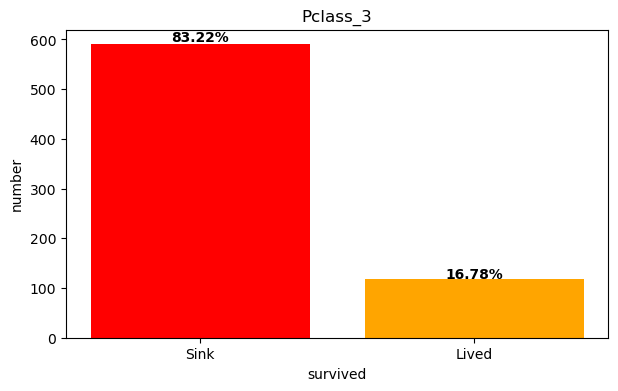

In [422]:
bar_plot(Pclass_3, "number", "survived", "Pclass_3")

In [403]:
df.Sex.value_counts()

0    843
1    464
Name: Sex, dtype: int64

In [404]:
sink_male = len(df["Age"][(df["Sex"] == 1) & (df["Survived"] == 0)])

In [405]:
survived_male = len(df["Age"][(df["Pclass"] == 1) & (df["Survived"] == 1)])

In [406]:
men = {"Sink":sink_male, "Lived":survived_male}

       Count Survived
Sink     233     Sink
Lived    134    Lived


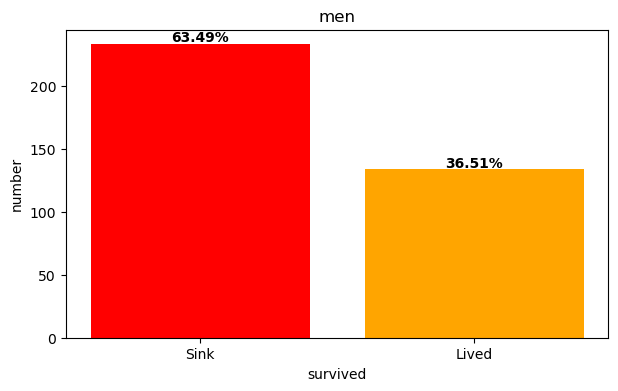

In [423]:
bar_plot(men, "number", "survived", "men")

In [408]:
sink_female = len(df["Age"][(df["Sex"] == 0) & (df["Survived"] == 0)])

In [409]:
survived_female = len(df["Age"][(df["Sex"] == 0) & (df["Survived"] == 1)])

In [410]:
women = {"Sink":sink_female, "Lived":survived_female}

       Count Survived
Sink     734     Sink
Lived    109    Lived


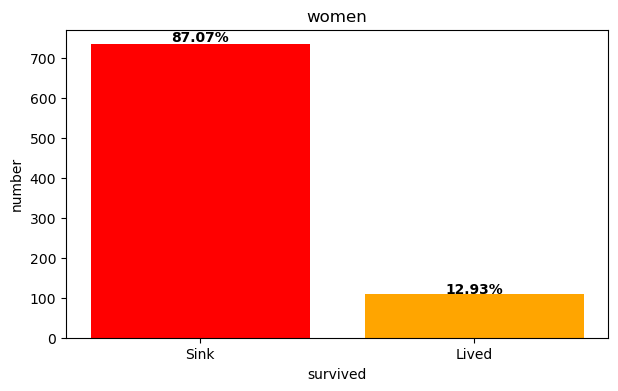

In [424]:
bar_plot(women, "number", "survived", "women")

In [505]:
dict(df.Fare.value_counts())

{8.05: 60,
 13.0: 59,
 7.75: 55,
 26.0: 50,
 7.8958: 49,
 10.5: 35,
 7.775: 26,
 7.2292: 24,
 7.925: 23,
 26.55: 22,
 7.225: 21,
 8.6625: 21,
 7.8542: 21,
 7.25: 18,
 0.0: 17,
 21.0: 14,
 16.1: 12,
 9.5: 12,
 14.4542: 11,
 14.5: 11,
 27.7208: 11,
 69.55: 11,
 15.5: 10,
 7.8792: 10,
 7.7958: 10,
 15.2458: 9,
 24.15: 9,
 7.05: 9,
 7.55: 8,
 56.4958: 8,
 46.9: 8,
 52.0: 8,
 23.0: 7,
 13.5: 7,
 39.0: 7,
 39.6875: 7,
 31.3875: 7,
 73.5: 7,
 31.275: 7,
 30.0: 7,
 262.375: 7,
 7.7333: 7,
 79.2: 6,
 83.1583: 6,
 11.5: 6,
 263.0: 6,
 151.55: 6,
 7.65: 6,
 30.5: 6,
 53.1: 6,
 27.9: 6,
 26.25: 6,
 29.125: 6,
 34.375: 5,
 12.35: 5,
 65.0: 5,
 134.5: 5,
 211.5: 5,
 29.7: 5,
 25.4667: 5,
 227.525: 5,
 27.75: 5,
 21.075: 5,
 90.0: 5,
 15.85: 4,
 41.5792: 4,
 35.5: 4,
 23.45: 4,
 7.125: 4,
 110.8833: 4,
 211.3375: 4,
 18.0: 4,
 36.75: 4,
 52.5542: 4,
 164.8667: 4,
 12.475: 4,
 51.8625: 4,
 120.0: 4,
 19.2583: 4,
 55.4417: 4,
 14.4583: 4,
 20.575: 4,
 59.4: 4,
 512.3292: 4,
 135.6333: 4,
 221.7792: 4,


In [120]:
len(df["Fare"][(df["Fare"] > 220) & (df["Survived"] == 0)])

18

In [121]:
len(df["Fare"][(df["Fare"] > 220) & (df["Survived"] == 1)])

11

In [122]:
dict(df.sibsp.value_counts())

{0: 889, 1: 319, 2: 42, 4: 22, 3: 20, 8: 9, 5: 6}

In [125]:
len(df["sibsp"][(df["sibsp"] == 0) & (df["Survived"] == 1)])

208

In [137]:
len(df["sibsp"][(df["sibsp"] == 5) & (df["Survived"] == 1)])

0

In [223]:
import seaborn as sns

def count_plot(df, col, title):
    n_data = df[col].value_counts().sum()
    max_type_count = df[col].value_counts()[0]
    max_prop = max_type_count / n_data

    tick_props = np.arange(0, max_prop, 0.1)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]

    sns.countplot(data=df, y = col);
    plt.title(title)
    plt.xticks(tick_props * n_data, tick_names)
    plt.xlabel('proportion');

    for i in range(df[col].value_counts().shape[0]):
        count = df[col].value_counts()[i]
        pct_string = '{:0.1f}'.format(100*count/n_data)
        plt.text(count+1, i, pct_string, va='center')

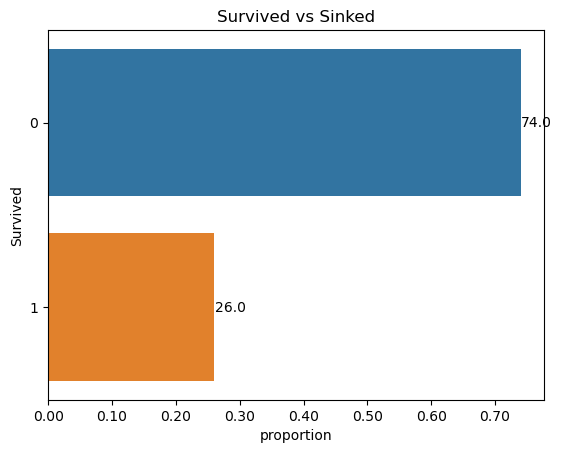

In [201]:
count_plot(df, "Survived", "Survived vs Sinked")

In [140]:
df.corr()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
Passengerid,1.000000,0.025792,0.031945,-0.012297,-0.055696,0.008576,-0.039776,-0.051518,-0.331125
Age,0.025792,1.000000,0.176554,-0.057161,-0.189332,-0.125112,-0.375811,-0.065125,-0.060236
Fare,0.031945,0.176554,1.000000,0.184192,0.161141,0.222422,-0.557915,-0.239212,0.171942
Sex,-0.012297,-0.057161,0.184192,1.000000,0.110768,0.214371,-0.121826,-0.099408,0.401985
sibsp,-0.055696,-0.189332,0.161141,0.110768,1.000000,0.373383,0.059819,0.066055,-0.013174
Parch,0.008576,-0.125112,0.222422,0.214371,0.373383,1.000000,0.017304,0.045216,0.056183
Pclass,-0.039776,-0.375811,-0.557915,-0.121826,0.059819,0.017304,1.000000,0.187349,-0.241672
Embarked,-0.051518,-0.065125,-0.239212,-0.099408,0.066055,0.045216,0.187349,1.000000,-0.093225
Survived,-0.331125,-0.060236,0.171942,0.401985,-0.013174,0.056183,-0.241672,-0.093225,1.000000


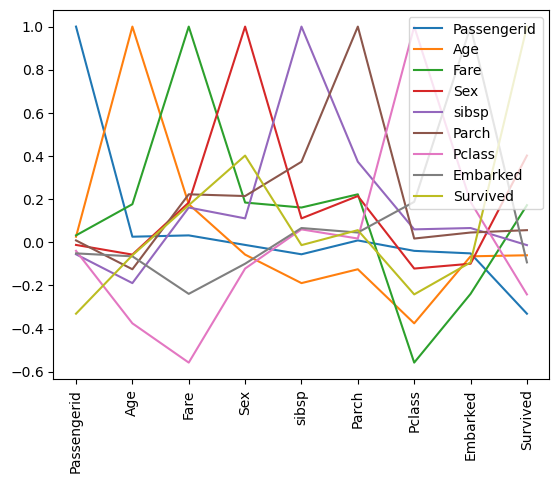

In [144]:
df.corr().plot()
plt.xticks(rotation=90);